This notebook compares the 'old' and 'new' INRIX datasets.
Source: https://drive.google.com/drive/folders/1cd4Gb1KGjDFGpRhn7XLSixssxgtjWELA

In [1]:
import pandas as pd
import os
from pandas import read_csv
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
### Import raw files

In [3]:
old = pd.read_csv('travel_time_skim-001.csv')

In [4]:
new = pd.read_csv('travel_time_skim_V2-001.csv')

In [5]:
# Note: there is an existing notebook which Xiaodan uses to process the INRIX data
# This notebook compares the raw files in the GEMS folder

In [6]:
### Preliminary look at files

In [7]:
old.head()

,Unnamed: 0,origin,destination,distance,distance_mile,travel_time_h,avg_speed
0,0,6001430300,6001425103,14.041099,19.072999,0.581833,32.780854
1,1,6001431100,6001425103,16.177780,21.635947,0.635973,34.020232
2,2,6001435800,6001425103,14.281889,19.361825,0.590644,32.780854
3,3,6001437000,6001425103,16.971619,22.588157,0.651833,34.653305
4,4,6001437400,6001425103,17.675516,23.432481,0.664413,35.267935


In [8]:
new.head()

,Unnamed: 0,origin,destination,distance,distance_mile,travel_time_h,avg_speed
0,0,6001405800,6001400100,5.092027,8.431728,0.399796,21.090076
1,1,6001406500,6001400100,5.559215,8.992306,0.426376,21.090076
2,2,6001407101,6001400100,5.917569,9.422294,0.421318,22.363843
3,3,6001408400,6001400100,7.860745,11.753907,0.477062,24.638098
4,4,6001408500,6001400100,7.962388,11.875868,0.482012,24.638098


In [9]:
# Dimensions of datasets
print("Old length:", len(old))
print("New length:", len(new))

Old length: 24674818
New length: 24628276


In [10]:
print(len(new)/len(old))

0.998113785479593


In [11]:
summary_old = old.describe()

In [12]:
summary_new = new.describe()

In [13]:
print(summary_old)

         Unnamed: 0        origin   destination      distance  distance_mile  \
count  2.467482e+07  2.467482e+07  2.467482e+07  2.467482e+07   2.467482e+07   
mean   1.032130e+07  6.053764e+09  6.053764e+09  4.574721e+01   5.710470e+01   
std    6.047912e+06  2.380572e+07  2.380572e+07  2.751380e+01   3.313567e+01   
min    0.000000e+00  6.001400e+09  6.001400e+09  0.000000e+00   3.631533e-01   
25%    5.183406e+06  6.037302e+09  6.037302e+09  2.191539e+01   2.862660e+01   
50%    1.023870e+07  6.059002e+09  6.059002e+09  4.206031e+01   5.279696e+01   
75%    1.529294e+07  6.071007e+09  6.071007e+09  6.840633e+01   8.431800e+01   
max    2.467482e+07  6.115041e+09  6.115041e+09  9.999999e+01   4.434298e+02   

       travel_time_h     avg_speed  
count   2.467482e+07  2.467482e+07  
mean    1.216473e+00  4.350245e+01  
std     5.460169e-01  1.021120e+01  
min     3.194444e-02  3.278452e+00  
25%     7.663889e-01  3.791863e+01  
50%     1.164460e+00  4.642752e+01  
75%     1.648335e+00

In [14]:
print(summary_new)

         Unnamed: 0        origin   destination      distance  distance_mile  \
count  2.462828e+07  2.462828e+07  2.462828e+07  2.462828e+07   2.462828e+07   
mean   9.956781e+06  6.053767e+09  6.053767e+09  4.573592e+01   5.720026e+01   
std    5.964219e+06  2.379183e+07  2.379183e+07  2.750745e+01   3.316493e+01   
min    0.000000e+00  6.001400e+09  6.001400e+09  0.000000e+00   2.808422e-01   
25%    4.866754e+06  6.037302e+09  6.037302e+09  2.191058e+01   2.872652e+01   
50%    9.768088e+06  6.059002e+09  6.059002e+09  4.205508e+01   5.292072e+01   
75%    1.476206e+07  6.071007e+09  6.071007e+09  6.837922e+01   8.441579e+01   
max    2.462828e+07  6.115041e+09  6.115041e+09  1.000000e+02   4.434298e+02   

       travel_time_h     avg_speed  
count   2.462828e+07  2.462828e+07  
mean    1.253931e+00  4.228444e+01  
std     5.570854e-01  1.024672e+01  
min     3.333333e-02  3.339008e+00  
25%     8.001265e-01  3.653751e+01  
50%     1.203807e+00  4.504703e+01  
75%     1.693363e+00

In [15]:
diff_sum = summary_new - summary_old

In [16]:
print(diff_sum)

          Unnamed: 0        origin   destination      distance  distance_mile  \
count  -46542.000000 -46542.000000 -46542.000000 -46542.000000  -46542.000000   
mean  -364521.278652   2770.997479   2770.997479     -0.011287       0.095555   
std    -83692.658028 -13885.854786 -13885.854786     -0.006345       0.029270   
min         0.000000      0.000000      0.000000      0.000000      -0.082311   
25%   -316652.250000     -1.000000     -1.000000     -0.004814       0.099926   
50%   -470609.000000      1.000000      1.000000     -0.005227       0.123756   
75%   -530879.500000     -1.000000     -1.000000     -0.027111       0.097786   
max    -46542.000000      0.000000      0.000000      0.000004       0.000000   

       travel_time_h     avg_speed  
count  -46542.000000 -46542.000000  
mean        0.037458     -1.218009  
std         0.011068      0.035518  
min         0.001389      0.060556  
25%         0.033738     -1.381128  
50%         0.039347     -1.380486  
75%        

In [17]:
# K-S test: speed
from scipy.stats import ks_2samp

In [18]:
ks_statistic_speed, p_value_speed = ks_2samp(old['avg_speed'], new['avg_speed'])

In [19]:
print(ks_statistic_speed)

0.15816245539130025


In [20]:
print(p_value_speed)

0.0


In [21]:
# K-S test: speed
ks_statistic_distance, p_value_distance = ks_2samp(old['distance'], new['distance'])

In [22]:
print(ks_statistic_distance)

0.0002444446924391164


In [23]:
print(p_value_distance)

0.45287959126657984


In [24]:
# K-S test: travel time
ks_statistic_tt, p_value_tt = ks_2samp(old['travel_time_h'], new['travel_time_h'])

In [25]:
print(ks_statistic_tt)

0.026764320535967334


In [26]:
print(p_value_tt)

0.0


In [27]:
# Histograms

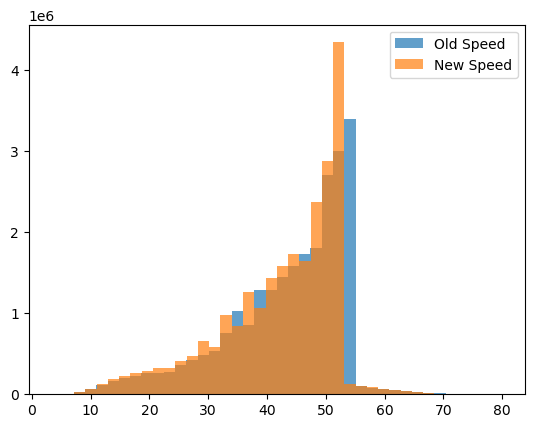

In [28]:
plt.hist(old['avg_speed'], bins=40, alpha=0.7, label='Old Speed')
plt.hist(new['avg_speed'], bins=40, alpha=0.7, label='New Speed')
plt.legend(loc='upper right')
plt.show()

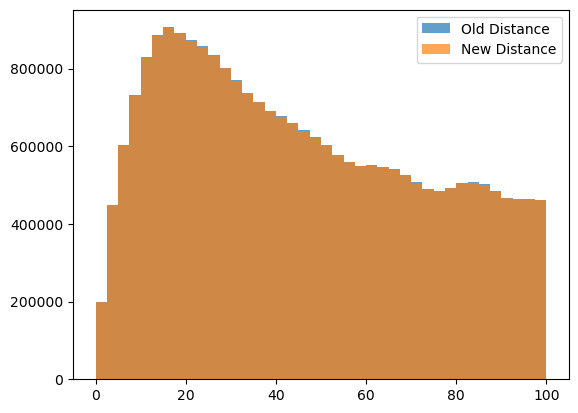

In [29]:
plt.hist(old['distance'], bins=40, alpha=0.7, label='Old Distance')
plt.hist(new['distance'], bins=40, alpha=0.7, label='New Distance')
plt.legend(loc='upper right')
plt.show()

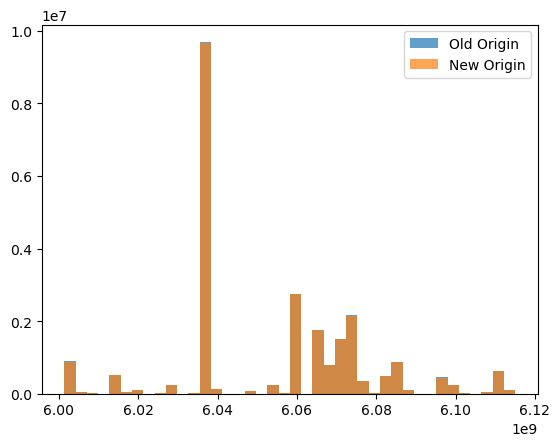

In [30]:
plt.hist(old['origin'], bins=40, alpha=0.7, label='Old Origin')
plt.hist(new['origin'], bins=40, alpha=0.7, label='New Origin')
plt.legend(loc='upper right')
plt.show()

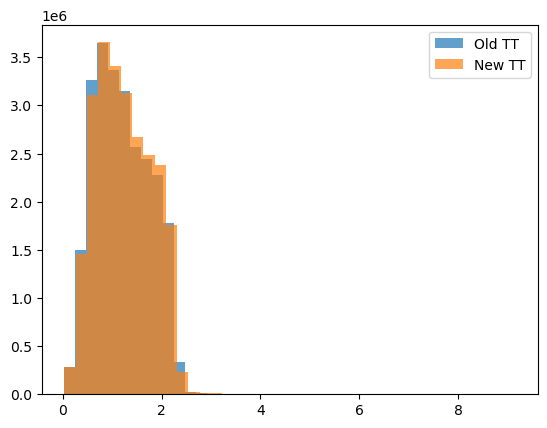

In [31]:
plt.hist(old['travel_time_h'], bins=40, alpha=0.7, label='Old TT')
plt.hist(new['travel_time_h'], bins=40, alpha=0.7, label='New TT')
plt.legend(loc='upper right')
plt.show()

In [32]:
# Look by od pair
new['OD'] = new['origin'].astype(str) + "_" + new['destination'].astype(str)
old['OD'] = old['origin'].astype(str) + "_" + old['destination'].astype(str)

In [33]:
# OD Lookup
od_lookup = "6001405800_6001400100"

# Filter by OD column match
match_old = old[old['OD'] == od_lookup]
match_new = new[new['OD'] == od_lookup]

In [34]:
print(match_old)

        Unnamed: 0      origin  destination  distance  distance_mile  \
185257      185257  6001405800   6001400100  5.085464       8.330714   

        travel_time_h  avg_speed                     OD  
185257       0.381084  21.860568  6001405800_6001400100  


In [35]:
print(match_new)

   Unnamed: 0      origin  destination  distance  distance_mile  \
0           0  6001405800   6001400100  5.092027       8.431728   

   travel_time_h  avg_speed                     OD  
0       0.399796  21.090076  6001405800_6001400100  


In [36]:
# Tht 'new' dataset drops observations from the weekend
# Usually those correspond to higher speeds
# This means that the overall speed goes down in the 'new' data
# Hence, average travel time goes up in the 'new' data
# Differences seem tolerable.

In [40]:
# Add scatter plots

In [45]:
# Travel time
#plt.scatter(old['distance'], old['travel_time_h'], color='blue', marker='o')
#plt.scatter(new['distance'], new['travel_time_h'], color='red', marker='x')
#plt.legend(loc='upper right')
#plt.show()

In [46]:
# Avg speed
#plt.scatter(old['distance'], old['avg_speed'], color='blue', marker='o')
#plt.scatter(new['distance'], new['avg_speed'], color='red', marker='x')
#plt.legend(loc='upper right')
#plt.show()